In [41]:
import operator
from dateutil import parser
from datetime import datetime
import numpy as np
import re
import json
import pandas as pd
import matplotlib.cm as cm
paa_gen = ['Pflegefachassistent', 'Pflegefachhelfer', 'generalistisch', 'Pflegeassistent', 'Pflegehelfer', 'Pflegekr', 'Pflegehilfskr', 'Pflegeservicekr']
paa_kh = ['Krankenpflegehelfer', '(Krankenpflege)', 'Krankenpflegekr']
paa_ap = ['Altenpflegehelfer', '(Altenpflege)', 'Altenpflegeassistent', 'Altenpflegekr']
paa_zweiteiler_prefix = ['Helfer', 'Hilfskr']
paa_zweiteiler_gen = ['Pflege']
paa_zweiteiler_ap = ['Altenpflege', 'Ambulant']
paa_zweiteiler_kh = ['Altenpflege', 'Ambulant', 'Krankenhaus', 'Station']
years = [ '2020', '2021', '2022', '2023']
path = ''

count_all_gen = {}
count_all_kh = {}
count_all_ap = {}
count_all_in_year = {}
for year in years:
    with open(f"paa_{year}.json", 'r') as file:
        output = json.load(file)
    sorted_output = sorted(output, key=lambda x: x["date"])
    df_full = pd.DataFrame({
        "date": [entry["date"] for entry in sorted_output],
        "job_title": [entry["job_title"] for entry in sorted_output],
        "via_intermediary": [entry["via_intermediary"] for entry in sorted_output],
    })
    df_full = df_full[df_full["via_intermediary"] != True]
    df_full['gen'] = pd.NA
    df_full['kh'] = pd.NA
    df_full['ap'] = pd.NA
    for i in range(len(paa_gen)):
        result = df_full['job_title'].str.contains(paa_gen[i], case=False, na=False)
        df_full.loc[result, 'gen'] = 1
    for i in range(len(paa_kh)):
        result = df_full['job_title'].str.contains(rf'\b{paa_kh[i]}', case=False, na=False)
        df_full.loc[result, 'kh'] = 1
    for i in range(len(paa_ap)):
        result = df_full['job_title'].str.contains(paa_ap[i], case=False, na=False)
        df_full.loc[result, 'ap'] = 1
    for i in range(len(paa_zweiteiler_gen)):
        for h in range(len(paa_zweiteiler_prefix)):
            result = df_full['job_title'].str.contains(paa_zweiteiler_gen[i], case=False, na=False) & df_full['job_title'].str.contains(paa_zweiteiler_prefix[h], case=False, na=False)
            df_full.loc[result, 'gen'] = 1
    for i in range(len(paa_zweiteiler_ap)):
        for h in range(len(paa_zweiteiler_prefix)):
            result = df_full['job_title'].str.contains(paa_zweiteiler_ap[i], case=False, na=False) & df_full['job_title'].str.contains(paa_zweiteiler_prefix[h], case=False, na=False)
            df_full.loc[result, 'ap'] = 1
    for i in range(len(paa_zweiteiler_kh)):
        for h in range(len(paa_zweiteiler_prefix)):
            result = df_full['job_title'].str.contains(paa_zweiteiler_kh[i], case=False, na=False) & df_full['job_title'].str.contains(paa_zweiteiler_prefix[h], case=False, na=False)
            df_full.loc[result, 'kh'] = 1
    condition = df_full['gen'].isna() & df_full['kh'].isna() & df_full['ap'].isna()
    df_full = df_full.drop(df_full[condition].index)
    count_all_gen[year] = (df_full['gen'] == 1).sum()
    count_all_kh[year] = (df_full['kh'] == 1).sum()
    count_all_ap[year] = (df_full['ap'] == 1).sum()
    count_all_in_year[year] = len(df_full)
    print(f"Jahr {year} abgeschlossen, insg. {count_all_in_year[year]} Stellenanzeigen:")
    print(f"{count_all_gen[year]} Stellenanzeigen mit generalistischen Berufsbezeichnungen")
    print(f"{count_all_kh[year]} Stellenanzeigen mit KH-Berufsbezeichnungen")
    print(f"{count_all_ap[year]} Stellenanzeigen mit AP-Berufsbezeichnungen\n\n")
    del df_full

Jahr 2020 abgeschlossen, insg. 19390 Stellenanzeigen:
18074 Stellenanzeigen mit generalistischen Berufsbezeichnungen
2559 Stellenanzeigen mit KH-Berufsbezeichnungen
1656 Stellenanzeigen mit AP-Berufsbezeichnungen


Jahr 2021 abgeschlossen, insg. 27659 Stellenanzeigen:
26278 Stellenanzeigen mit generalistischen Berufsbezeichnungen
4338 Stellenanzeigen mit KH-Berufsbezeichnungen
2809 Stellenanzeigen mit AP-Berufsbezeichnungen


Jahr 2022 abgeschlossen, insg. 38400 Stellenanzeigen:
36864 Stellenanzeigen mit generalistischen Berufsbezeichnungen
11300 Stellenanzeigen mit KH-Berufsbezeichnungen
8234 Stellenanzeigen mit AP-Berufsbezeichnungen


Jahr 2023 abgeschlossen, insg. 42906 Stellenanzeigen:
41814 Stellenanzeigen mit generalistischen Berufsbezeichnungen
14091 Stellenanzeigen mit KH-Berufsbezeichnungen
10285 Stellenanzeigen mit AP-Berufsbezeichnungen




ValueError: shape mismatch: objects cannot be broadcast to a single shape

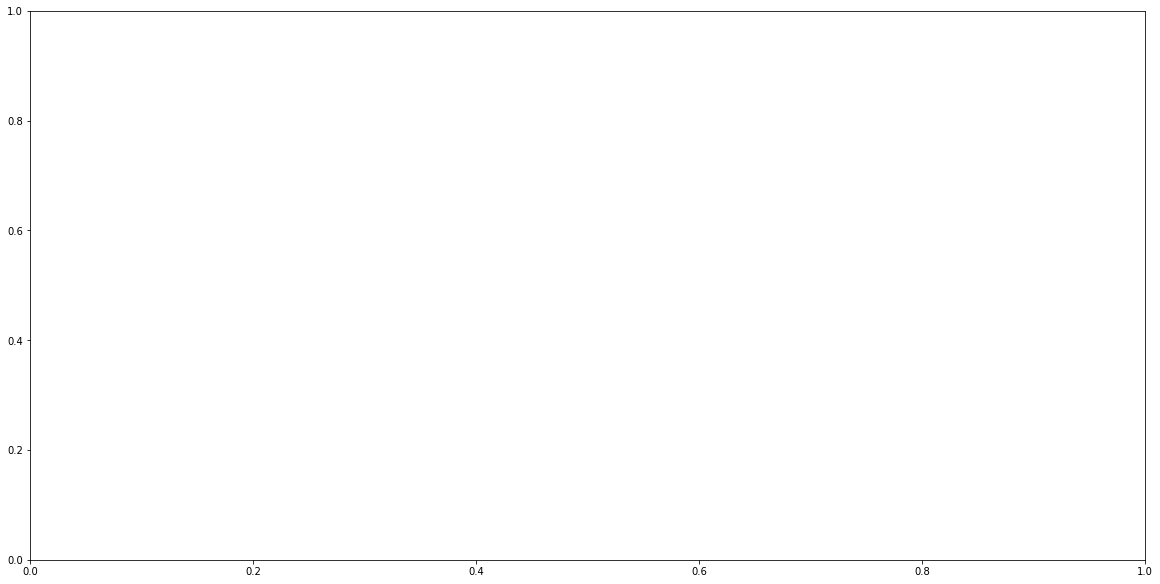

In [36]:
bar_colors = ["red", "blue", "green", "orange", "purple", "cyan", "brown", "pink", "lime", "yellow"]
xyears = np.arange(len(years))
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)
bartwo = ax.bar(xyears, count_all_in_year, color=bar_colors, edgecolor='black')
for rect in bartwo:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), 
            ha='center', va='bottom')
ax.set_xticks(xyears)
ax.set_xticklabels(years, rotation=45, ha='right')
ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl Stellenanzeigen')
ax.set_title('Stellenanzeigen pro Jahr über mehrere Jahre')
plt.show()

In [ ]:
bar_colors = ["blue", "red", "green"]
width = 0.2
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
rects1 = ax.bar(xyears - 1.5*width, count_all_gen, width, label='Generalistische PAA')
rects2 = ax.bar(xyears - 0.5*width, count_all_kh, width, label='Akutpflege-PAA')
rects3 = ax.bar(xyears + 1.5*width, count_all_ap, width, label='Altenpflege-PAA')
ax.plot(xyears, count_all_in_year, marker='o', color='black', label='Gesamt')
def add_bar_labels(rect_base):
    for rect in rect_base:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, 
            height - 0.5,
            str(int(height)), 
            ha='center', va='top', color='black', fontsize=10, fontweight='bold'
        )
add_bar_labels(rects1)
add_bar_labels(rects2)
add_bar_labels(rects3)
ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl Stellenanzeigen')
ax.set_title('Stellenanzeigen pro Jahr nach Art der Berufsbezeichnung')
ax.set_xticks(xyears)
ax.set_xticklabels(years)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
handles, labels = ax.get_legend_handles_labels()
order = [0, 1, 2, 3]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
totals = len(df_full)
percent_gen = np.array(count_all_gen) / totals * 100
percent_kh = np.array(count_all_kh) / totals * 100
percent_ap = np.array(count_all_ap) / totals * 100
rects1 = ax.bar(xyears - 1.5*width, percent_gen, width, label='Generalistische PAA')
rects2 = ax.bar(xyears - 0.5*width, percent_kh, width, label='Akutpflege-PAA')
rects3 = ax.bar(xyears + 1.5*width, percent_ap, width, label='Altenpflege-PAA')
def add_bar_labels(rect_base):
    for rect in rect_base:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, 
            height - 0.5,
            str(round(height, 2)),
            ha='center', va='top', color='black', fontsize=10, fontweight='bold'
        )
add_bar_labels(rects1)
add_bar_labels(rects2)
add_bar_labels(rects3)
ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl Stellenanzeigen in Prozent')
ax.set_title('Stellenanzeigen pro Jahr nach Art der Berufsbezeichnung (relativ)')
ax.set_xticks(xyears)
ax.set_xticklabels(years)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
handles, labels = ax.get_legend_handles_labels()
order = [0, 1, 2]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()